[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.3%20%EB%AA%A8%EB%A9%98%ED%85%80%20%EC%A7%80%ED%91%9C%20RSI-output.ipynb)

# RSI(Relative Strength Index)

* 모멘텀 : 운동량 (運動量, 영어: momentum)은 물리학 특히, 뉴턴 역학에서 물체의 질량과 속도의 곱으로 나타내는 물리량이다


상대강도지수(相對强度指數, 영어: relative strength index, RSI)는 주식, 선물, 옵션 등의 기술적 분석에 사용되는 보조 지표이다. RSI는 가격의 상승압력과 하락압력 간의 상대적인 강도를 나타낸다. 1978년 미국의 월레스 와일더(J. Welles Wilder Jr.)가 개발했다.


RSI는 일정 기간 동안 주가가 전일 가격에 비해 상승한 변화량과 하락한 변화량의 평균값을 구하여, 상승한 변화량이 크면 과매수로, 하락한 변화량이 크면 과매도로 판단하는 방식이다.

계산 방법은 다음과 같다. 주어진 기간의 모든 날의 주가에 대해서

* 가격이 전일 가격보다 상승한 날의 상승분은 U(up) 값이라고 하고,
* 가격이 전일 가격보다 하락한 날의 하락분은 D(down) 값이라고 한다.
* U값과 D값의 평균값을 구하여 그것을 각각 AU(average ups)와 AD(average downs)라 한다.
*  AU를 AD값으로 나눈 것을 RS(relative strength) 값이라고 한다. RS 값이 크다는 것은 일정 기간 하락한 폭보다 상승한 폭이 크다는 것을 의미한다.
다음 계산에 의하여 RSI 값을 구한다.


* RSI 계산 공식 :
    * RS = AU / AD
    * RSI = RS / (1 + RS) = AU / (AU + AD)

대체로 이 값은 백분율로 나타낸다.

이 지표의 파라메터로는 기간을 며칠 동안으로 할 것인가가 있다. Welles Wilder는 14일을 사용할 것을 권유했다. 대체로 사용되는 값은 9일, 14 ~ 15일, 25 ~ 28일 등이다.

RSI 그래프는 이동평균선을 함께 나타내는 것이 보통이며, 이동평균선을 며칠선으로 할 것인가 역시 파라메터로 주어진다. RSI를 15일에 대하여 구하고 5일 이동평균선을 함께 표시하는 경우 그래프에 (15, 5)라고 표시해주는 것이 일반적이다.

유사한 지표로는 스토캐스틱이 있다. RSI 그래프의 형태는 fast stochastic과 비슷하게 나온다.


출처 : https://ko.wikipedia.org/wiki/RSI_(%ED%88%AC%EC%9E%90%EC%A7%80%ED%91%9C)

* 지표의 파라메터를 14일로 했을 때
    * RSI = 14일의 상승폭 합계 / (14일의 상승폭 합계 + 14일의 하락폭 합)
    * 수식에 따라 RSI 는 0~1 사이의 값 만을 가지게 됩니다.
    * 만일 14일 동안 매일 상승하게 되면 1이 나오고 14일 동안 매일 하락하게 되면 0이 나옵니다.
    * 보통 0.7이 과열, 0.3이 침체로 봅니다.

## RSI 계산 공식
1. U = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
2. D = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
3. AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
4. AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)
5. RS = AU / AD
6. RSI = AU / (AU+AD) = RS / (1+RS)
7. RSI 시그널 = RSI의 이동평균선 (6일의 이동평균선 사용)

## 라이브러리 로드

In [3]:
# 데이터 분석을 위해 pandas, numpy 시각화를 위해 matplotlib 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 개별종목 일별시세 가져오기

In [5]:
!pip install finance-datareader

In [6]:
# FinanceDataReader 불러오기
import FinanceDataReader as fdr

In [17]:
# 005930 : 삼성전자
df = fdr.DataReader("453870", "2020")
df.shape

(300, 6)

## 전일 대비 상승, 하락 변수 생성하기

In [18]:
# 전일 대비 가격 차이 구해서 diff 컬럼을 생성합니다.
# 결측치는 제거합니다.
df["diff"] = df["Close"].diff()

In [19]:
def UD(diff):
    """
    diff 값을 입력받아 0이면 ups, downs을 0으로
    0보다 크면 ups 에 diff값을 작으면 downs 에 abs(diff) 값을 반환합니다.
    ups = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
    downs = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
    """
    ups = 0
    downs = 0
    if diff > 0:
        ups = diff
    elif diff < 0:
        downs = abs(diff)
    return pd.Series([ups, downs])

In [20]:
# 위에서 만든 함수를 통해 "U", "D" 컬럼 생성하기
df[["U", "D"]] = df["diff"].apply(UD)
df.tail()

,Open,High,Low,Close,Volume,Change,diff,U,D
Date,,,,,,,,,
2024-07-01,13520,13570,13480,13545,355302,0.000000,0.0,0.0,0.0
2024-07-02,13575,13690,13550,13670,437300,0.009228,125.0,125.0,0.0
2024-07-03,13710,13790,13670,13740,692550,0.005121,70.0,70.0,0.0
2024-07-04,13740,13760,13675,13685,676402,-0.004003,-55.0,0.0,55.0
2024-07-05,13685,13700,13600,13605,417412,-0.005846,-80.0,0.0,80.0


## AU / AD 변수 생성하기
* AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
* AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)

In [21]:
# AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
# AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)
df["AU"] = df["U"].rolling(14).mean()
df["AD"] = df["D"].rolling(14).mean()
df.tail()

,Open,High,Low,Close,Volume,Change,diff,U,D,AU,AD
Date,,,,,,,,,,,
2024-07-01,13520,13570,13480,13545,355302,0.000000,0.0,0.0,0.0,41.071429,6.428571
2024-07-02,13575,13690,13550,13670,437300,0.009228,125.0,125.0,0.0,50.000000,6.428571
2024-07-03,13710,13790,13670,13740,692550,0.005121,70.0,70.0,0.0,55.000000,6.071429
2024-07-04,13740,13760,13675,13685,676402,-0.004003,-55.0,0.0,55.0,49.285714,10.000000
2024-07-05,13685,13700,13600,13605,417412,-0.005846,-80.0,0.0,80.0,43.571429,15.714286


## RS, RSI 만들기
* RS = AU / AD
* RSI = AU / (AU+AD) = RS / (1+RS)

In [22]:
# RS, RSI값을 계산해 컬럼에 담습니다.
df["RS"] = df["AU"] / df["AD"]
df["RSI"] = df["RS"] / (1 + df["RS"])
df.tail()

,Open,High,Low,Close,Volume,Change,diff,U,D,AU,AD,RS,RSI
Date,,,,,,,,,,,,,
2024-07-01,13520,13570,13480,13545,355302,0.000000,0.0,0.0,0.0,41.071429,6.428571,6.388889,0.864662
2024-07-02,13575,13690,13550,13670,437300,0.009228,125.0,125.0,0.0,50.000000,6.428571,7.777778,0.886076
2024-07-03,13710,13790,13670,13740,692550,0.005121,70.0,70.0,0.0,55.000000,6.071429,9.058824,0.900585
2024-07-04,13740,13760,13675,13685,676402,-0.004003,-55.0,0.0,55.0,49.285714,10.000000,4.928571,0.831325
2024-07-05,13685,13700,13600,13605,417412,-0.005846,-80.0,0.0,80.0,43.571429,15.714286,2.772727,0.734940


## RSI signal 만들기
* RSI 시그널 = RSI의 이동평균선 (6일의 이동평균선 사용)

In [23]:
# RSI_signal 변수를 생성합니다.
df['RSI_signal'] = df["RSI"].rolling(6).mean()
df.tail()

,Open,High,Low,Close,Volume,Change,diff,U,D,AU,AD,RS,RSI,RSI_signal
Date,,,,,,,,,,,,,,
2024-07-01,13520,13570,13480,13545,355302,0.000000,0.0,0.0,0.0,41.071429,6.428571,6.388889,0.864662,0.840798
2024-07-02,13575,13690,13550,13670,437300,0.009228,125.0,125.0,0.0,50.000000,6.428571,7.777778,0.886076,0.893303
2024-07-03,13710,13790,13670,13740,692550,0.005121,70.0,70.0,0.0,55.000000,6.071429,9.058824,0.900585,0.889721
2024-07-04,13740,13760,13675,13685,676402,-0.004003,-55.0,0.0,55.0,49.285714,10.000000,4.928571,0.831325,0.874375
2024-07-05,13685,13700,13600,13605,417412,-0.005846,-80.0,0.0,80.0,43.571429,15.714286,2.772727,0.734940,0.847539



## RSI의 해석
1. RSI는 50%를 기준으로, 50% 이상은 매수세 우세, 50% 이하는 매도세 우세를 나타냅니다.
2. RSI가 70% 이상이면 매수세가 상당히 커서 초과매수 국면에 돌입했다고 판단합니다.
3. RSI가 30% 이하이면 매도세가 상당히 커서 초과매도 국면에 돌입했다고 판단합니다.
4. RSI가 시그널선을 상향돌파하면 단기적으로 매수세가 늘어나는 추세라고 판단합니다.
5. RSI가 시그널선을 하향돌파하면 단기적으로 매도세가 늘어나는 추세라고 판단합니다.


* [RSI (투자지표) - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/RSI_(%ED%88%AC%EC%9E%90%EC%A7%80%ED%91%9C))

<Axes: xlabel='Date'>

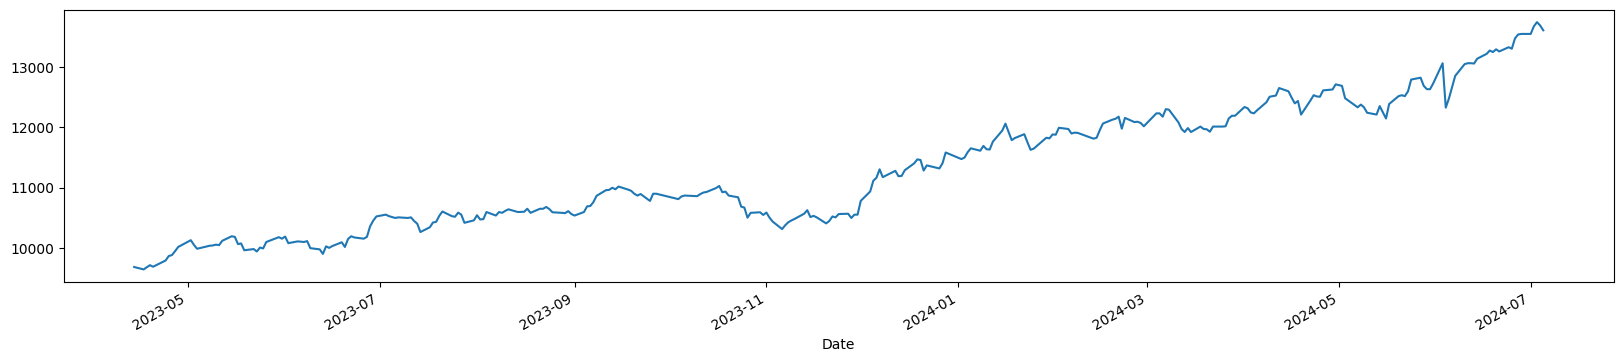

In [29]:
# RSI와 비교해 보기 위해 종가를 시각화 합니다.
df["Close"].plot(figsize=(20, 4))

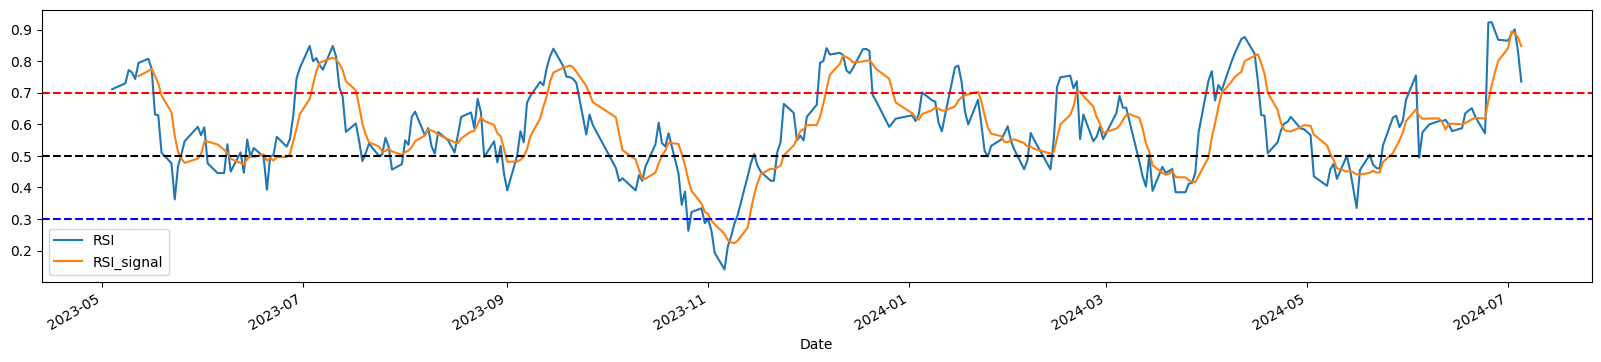

In [30]:
# 'RSI','RSI_signal' 을 시각화 하고 0.7, 0.5, 0.3 기준선을 그립니다.
df[["RSI", "RSI_signal"]].plot(figsize=(20, 4))
plt.axhline(0.7, c="r", ls="--")
plt.axhline(0.5, c="k", ls="--")
plt.axhline(0.3, c="b", ls="--")

## plotly를 통한 시각화

### plotly.express 로 간단하게 시각화 하기

In [32]:
# plotly 최신버전을 사용해 주세요. 최신버전이 아닐 때 동작하지 않을 수 있습니다.
# !pip install plotly --upgrade

In [33]:
# plotly.express 로드하기
import plotly.express as px

In [34]:
# 0.3, 0.7 값을 컬럼으로 만들어 줍니다.
df["s3"] = 0.3
df["s7"] = 0.7
df.head()

,Open,High,Low,Close,Volume,Change,diff,U,D,AU,AD,RS,RSI,RSI_signal,s3,s7
Date,,,,,,,,,,,,,,,,
2023-04-14,9812,9812,9666,9686,252195,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7
2023-04-17,9777,9777,9601,9646,168467,-0.004130,-40.0,0.0,40.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7
2023-04-18,9727,9727,9651,9681,105119,0.003628,35.0,35.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7
2023-04-19,9752,9752,9616,9716,168545,0.003615,35.0,35.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7
2023-04-20,9762,9762,9666,9691,117011,-0.002573,-25.0,0.0,25.0,NaN,NaN,NaN,NaN,NaN,0.3,0.7


In [35]:
# plotly.express 를 통해 시각화 합니다.
px.line(df[["RSI", "RSI_signal", "s3", "s7"]])

### graph_objs 와 subplots 을 사용한 시각화

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1,
                    vertical_spacing=0.01,
                    shared_xaxes=True,
                    subplot_titles=('<b>TIGER인도Nifty50</b>',
                                    '<b>Select Date Range!</b>',
                                    '<b>RSI & RSI signal</b>'))

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],name='candle stick'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df['RSI'],
                         line=dict(color='blue'),
                         name='RSI'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['RSI_signal'],
                         line=dict(color='red'),
                         name='RSI_signal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=np.ones(len(df))*0.3,
                         line=dict(color='red',dash='dash'),
                         name='Low bound'),row=3,col=1)
fig.add_trace(go.Scatter(x=df.index, y=np.ones(len(df))*0.7,
                         line=dict(color='blue',dash='dash'),
                         name='High bound'),row=3,col=1)

fig.update_layout(width=1500, height=800, xaxis_rangeslider_visible=True)

fig.show()

* (주의사항) RSI 지표역시 하나의 단순한 지표이기 때문에 너무 맹신하여서는 안 됩니다.